<a href="https://colab.research.google.com/github/Fernandaqsouza/MBA_AnalyticsFinanceiro/blob/main/proj_telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto de análise financeira e econômica do setor de Telecomunicações**

## *MBA BI & Analytics | Analytics para Finanças e Investimentos*

### **Alunas: Fernanda Souza e Janaina Marques**

## Importação e instalação de bibliotecas

In [ ]:
#Importando bibliotecas
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
import io

## Importação e leitura do arquivo

In [ ]:
#Importando o arquivo
from google.colab import files
uploaded = files.upload()

Saving dataset_telecom.csv to dataset_telecom (1).csv


In [ ]:
#Leitura do arquivo
df_raw = pd.read_csv(io.BytesIO(uploaded['dataset_telecom.csv']))

#Visualização da base de dados
df_raw.head()

,Unnamed: 0,CNPJ_CIA,CD_CVM,DT_REFER,DT_INI_EXERC,DT_FIM_EXERC,DENOM_CIA,VERSAO,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,COLUNA_DF,source_file
0,1,02.558.157/0001-62,17671.0,2017,NA_character_,2017,TELEFÔNICA BRASIL S.A,1.0,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,1,Ativo Total,101382835.0,-2147483648,dfp_cia_aberta_BPA_con_2017.csv
1,2,02.558.157/0001-62,17671.0,2017,NA_character_,2017,TELEFÔNICA BRASIL S.A,1.0,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,1.01,Ativo Circulante,16731666.0,-2147483648,dfp_cia_aberta_BPA_con_2017.csv
2,3,02.558.157/0001-62,17671.0,2017,NA_character_,2017,TELEFÔNICA BRASIL S.A,1.0,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,1.01.01,Caixa e Equivalentes de Caixa,4050338.0,-2147483648,dfp_cia_aberta_BPA_con_2017.csv
3,4,02.558.157/0001-62,17671.0,2017,NA_character_,2017,TELEFÔNICA BRASIL S.A,1.0,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,1.01.01.01,Caixa e Contas Bancárias,117799.0,-2147483648,dfp_cia_aberta_BPA_con_2017.csv
4,5,02.558.157/0001-62,17671.0,2017,NA_character_,2017,TELEFÔNICA BRASIL S.A,1.0,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,1.01.01.02,Aplicações Financeiras,3932539.0,-2147483648,dfp_cia_aberta_BPA_con_2017.csv


## Definição das variáveis para análise

In [ ]:
#Análise da moeda considerada na base de dados
df_raw['MOEDA'].value_counts()

REAL    3283
Name: MOEDA, dtype: int64

Analisando a base de dados acima, temos interesse nas seguintes variáveis:

1. DT_FIM_EXERC: Ano de referencia
2. DENOM_CIA: Denominação da empresa
3. DS_CONTA: Tipo de conta
4. VL_CONTA: Valor monetario

In [ ]:
#Mudança do tipo de variável para melhorar as analises futuras
df_raw['DT_FIM_EXERC'] = df_raw['DT_FIM_EXERC'].astype(str)

#Definição da tabela com as variaveis escolhidas
df_analysis = df_raw.pivot_table(index=['DENOM_CIA','DT_FIM_EXERC'], columns='DS_CONTA', values='VL_CONTA')
df_analysis = df_analysis.reset_index() # transforma índice hierárquico em colunas

#Visualização
df_analysis.head()

DS_CONTA,DENOM_CIA,DT_FIM_EXERC,"""Senior Notes"" Reestruturados",0,Adiantamento para Futuro Aumento de Capital,Adiantamentos a fornecedores,Ajuste de avaliação patrimonial - custo atribuído,Ajustes Acumulados de Conversão,Ajustes de Avaliação Patrimonial,Alienação de Bônus de Subscrição,...,Títulos Designados a Valor Justo,Títulos Disponíveis para Venda,Títulos Mantidos até o Vencimento,Títulos a Receber de Partes Relacionadas,Títulos a pagar,Títulos para Negociação,Valores a Restituir a Acionistas,Ágio,Ágio na Emissão de Ações,Ágios em Investimentos
0,ALGAR TELECOM S/A,2017,NaN,NaN,0.0,NaN,NaN,0.0,18986.0,0.0,...,NaN,0.0,0.0,1273.0,5820.0,0.0,35916.0,NaN,0.0,167288.0
1,ALGAR TELECOM S/A,2018,NaN,NaN,0.0,NaN,NaN,0.0,18443.0,0.0,...,0.0,NaN,NaN,NaN,4683.0,0.0,29162.0,NaN,0.0,167288.0
2,ALGAR TELECOM S/A,2019,NaN,NaN,0.0,NaN,NaN,0.0,4241.0,0.0,...,0.0,NaN,NaN,NaN,2817.0,0.0,28588.0,NaN,0.0,80075.0
3,ALGAR TELECOM S/A,2020,NaN,NaN,0.0,NaN,4226.0,0.0,4226.0,0.0,...,0.0,NaN,NaN,NaN,2002.5,0.0,92.0,NaN,0.0,80075.0
4,DESKTOP S.A.,2020,NaN,NaN,10270.5,0.0,NaN,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN


In [ ]:
#Definição de indicadores da situação economico-financeira

# capital circulante liquido
df_analysis['CCL'] = df_analysis['Ativo Circulante'] - df_analysis['Passivo Circulante']

# liquidez corrente
df_analysis['LiquidezCorrente'] = df_analysis['Ativo Circulante']/df_analysis['Passivo Circulante']

# liquidez a seco
df_analysis['LiquidezSeco'] = (df_analysis['Ativo Circulante'] - df_analysis['Estoques'])/df_analysis['Passivo Circulante']

# giro
df_analysis['Giro'] = df_analysis['Receita de Venda de Bens e/ou Serviços']/df_analysis['Ativo Total']

# retorno sobre os ativos
df_analysis['ROA'] = df_analysis['Resultado Antes do Resultado Financeiro e dos Tributos']/df_analysis['Ativo Total']

# retorno sobre o patrimonio liquido
df_analysis['ROE'] = df_analysis['Lucro/Prejuízo Consolidado do Período']/df_analysis['Patrimônio Líquido Consolidado']

# margem operacional
df_analysis['Mg_op'] = df_analysis['Resultado Antes do Resultado Financeiro e dos Tributos']/df_analysis['Receita de Venda de Bens e/ou Serviços']

# margem liquida
df_analysis['Mg_liq'] = df_analysis['Lucro/Prejuízo Consolidado do Período']/df_analysis['Receita de Venda de Bens e/ou Serviços']


df_analysis[['DENOM_CIA','DT_FIM_EXERC','CCL','LiquidezCorrente','LiquidezSeco','Giro','ROA','ROE','Mg_op','Mg_liq']]

DS_CONTA,DENOM_CIA,DT_FIM_EXERC,CCL,LiquidezCorrente,LiquidezSeco,Giro,ROA,ROE,Mg_op,Mg_liq
0,ALGAR TELECOM S/A,2017,-154019.0,0.852117,0.840602,0.735038,0.122611,0.196237,0.166809,0.084548
1,ALGAR TELECOM S/A,2018,71224.0,1.074446,1.053671,0.673154,0.141630,0.219939,0.210397,0.110221
2,ALGAR TELECOM S/A,2019,465477.0,1.653950,1.628407,0.600809,0.116805,0.228771,0.194414,0.105435
3,ALGAR TELECOM S/A,2020,177218.0,1.138431,1.122563,0.443797,0.097389,0.139013,0.219446,0.086089
4,DESKTOP S.A.,2020,18174.0,1.179610,1.179610,0.412988,0.117441,0.230796,0.284369,0.159158
5,OI S.A. - EM RECUPERAÇÃO JUDICIAL,2017,-44143859.0,0.349789,0.347921,0.346591,-0.034398,0.492592,-0.099246,-0.279792
6,OI S.A. - EM RECUPERAÇÃO JUDICIAL,2018,10624025.0,1.993879,1.979027,0.337114,-0.080508,1.075112,-0.238815,1.115845
7,OI S.A. - EM RECUPERAÇÃO JUDICIAL,2019,6157364.0,1.520227,1.506416,0.280090,-0.041415,-0.511061,-0.147862,-0.451680
8,OI S.A. - EM RECUPERAÇÃO JUDICIAL,2020,15782630.0,1.876175,1.865670,0.125736,-0.024529,-1.355035,-0.195084,-1.134011
9,TELEFÔNICA BRASIL S.A,2017,-1130865.0,0.936691,0.926928,0.426175,0.065433,0.066350,0.153536,0.106668


##Análises

In [ ]:
#Quantidade de dados considerados em cada ano
df_analysis['DT_FIM_EXERC'].value_counts()

2020    6
2017    3
2018    3
2019    3
Name: DT_FIM_EXERC, dtype: int64

Os dados considerados na base de dados são de 2017 a 2020. Como 2020 possui a maior quantidade de dados e é o ano mais recente, iremos focar nele.

##Gráficos

### Indicadores de Liquidez

Utilizado na análise da situação financeira da empresa. Analisa a capacidade da empresa de saldar seus compromissos de curto prazo.

[Text(0.5, 1.0, 'Liquidez Corrente por CIA')]

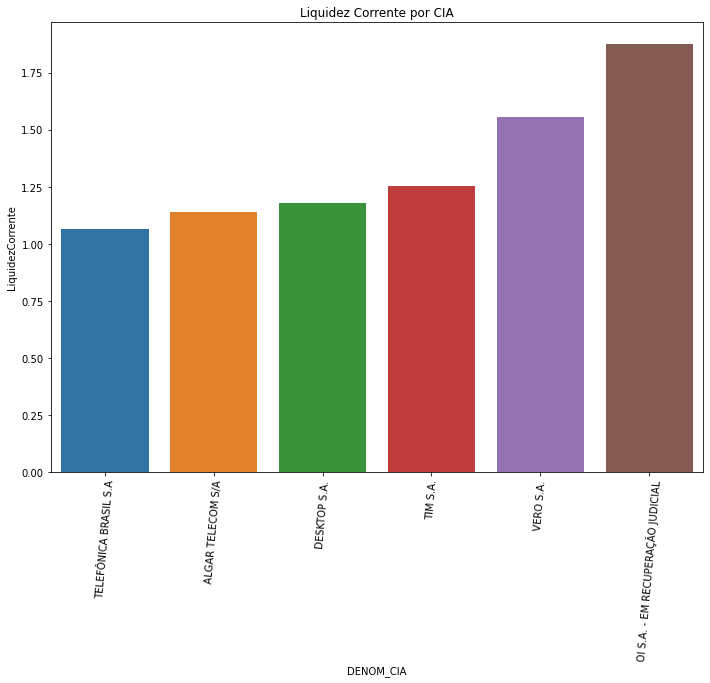

In [ ]:
fig, ax = pyplot.subplots(figsize=(11.7, 8.27))
ax.tick_params(axis='x', rotation=85)

#Plotar para 2020
df_analysis_2020 = df_analysis[df_analysis['DT_FIM_EXERC'] == '2020']
sns.barplot(data=df_analysis_2020, 
            x="DENOM_CIA", 
            y="LiquidezCorrente", 
            order = df_analysis_2020.sort_values('LiquidezCorrente').DENOM_CIA).set(title='Liquidez Corrente por CIA em 2020')

Analisando a liquidez corrente no ano de 2020, nenhuma das empresas possui liquidez menor do que 1, ou seja, todas são consideradas com boa capacidade de saldar compromissos a curto prazo.

[Text(0.5, 1.0, 'Liquidez a Seco por CIA')]

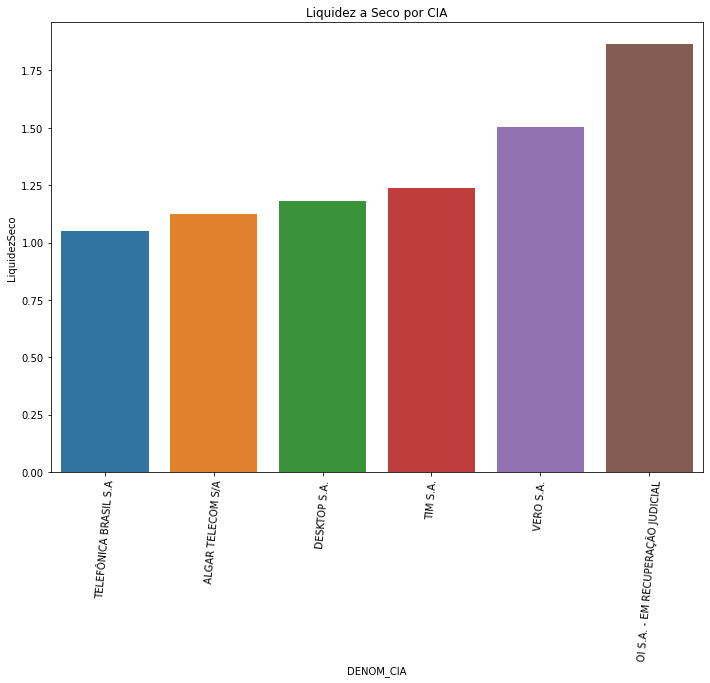

In [ ]:
fig, ax = pyplot.subplots(figsize=(11.7, 8.27))
ax.tick_params(axis='x', rotation=85)

#Plotar para 2020
df_analysis_2020 = df_analysis[df_analysis['DT_FIM_EXERC'] == '2020']
sns.barplot(data=df_analysis_2020, 
            x="DENOM_CIA", 
            y="LiquidezSeco", 
            order = df_analysis_2020.sort_values('LiquidezSeco').DENOM_CIA).set(title='Liquidez a Seco por CIA em 2020')

Analisando a liquidez a seco, vemos que possui um comportamento similar a liquidez corrente.

### Indicador Estrutural

Analisa o planejamento
financeiro e de perspectivas para um empresa.

[Text(0.5, 1.0, 'Giro por CIA')]

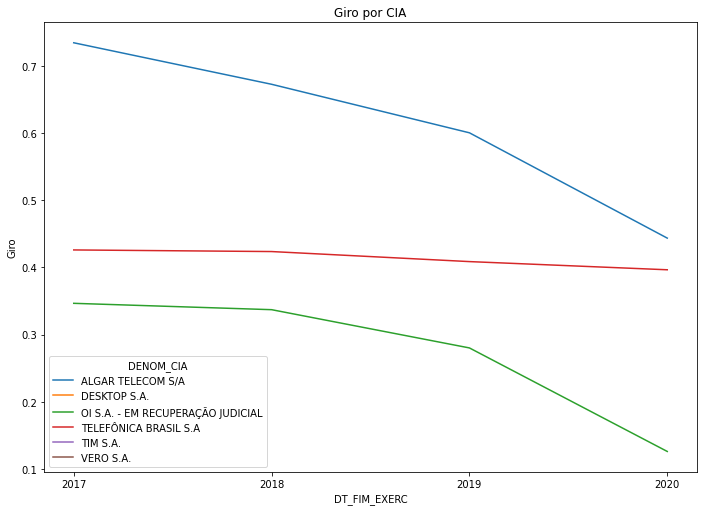

In [ ]:
fig, ax = pyplot.subplots(figsize=(11.7, 8.27))
sns.lineplot(data=df_analysis, x="DT_FIM_EXERC", y="Giro", hue="DENOM_CIA").set(title='Giro por CIA')

Percebemos no gráfico acima que as empresas Desktop, Tim e Vero não estão aparecendo. Então vamos analisar se elas possuem giro em algum ano.

In [ ]:
df_analysis.loc[df_analysis['DENOM_CIA'] == 'DESKTOP S.A.']

DS_CONTA,DENOM_CIA,DT_FIM_EXERC,"""Senior Notes"" Reestruturados",0,Adiantamento para Futuro Aumento de Capital,Adiantamentos a fornecedores,Ajuste de avaliação patrimonial - custo atribuído,Ajustes Acumulados de Conversão,Ajustes de Avaliação Patrimonial,Alienação de Bônus de Subscrição,...,Ágios em Investimentos,Liquidez,Giro,ROA,ROE,Mg_op,Mg_liq,CCL,LiquidezCorrente,LiquidezSeco
4,DESKTOP S.A.,2020,NaN,NaN,10270.5,0.0,NaN,0.0,0.0,0.0,...,NaN,1.17961,0.412988,0.117441,0.230796,0.284369,0.159158,18174.0,1.17961,1.17961


In [ ]:
df_analysis.loc[df_analysis['DENOM_CIA'] == 'TIM S.A.']

DS_CONTA,DENOM_CIA,DT_FIM_EXERC,"""Senior Notes"" Reestruturados",0,Adiantamento para Futuro Aumento de Capital,Adiantamentos a fornecedores,Ajuste de avaliação patrimonial - custo atribuído,Ajustes Acumulados de Conversão,Ajustes de Avaliação Patrimonial,Alienação de Bônus de Subscrição,...,Ágios em Investimentos,Liquidez,Giro,ROA,ROE,Mg_op,Mg_liq,CCL,LiquidezCorrente,LiquidezSeco
13,TIM S.A.,2020,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,...,NaN,1.239257,0.414549,0.067578,0.079529,0.163015,0.10677,2109600.0,1.254109,1.239257


In [ ]:
df_analysis.loc[df_analysis['DENOM_CIA'] == 'VERO S.A.']

DS_CONTA,DENOM_CIA,DT_FIM_EXERC,"""Senior Notes"" Reestruturados",0,Adiantamento para Futuro Aumento de Capital,Adiantamentos a fornecedores,Ajuste de avaliação patrimonial - custo atribuído,Ajustes Acumulados de Conversão,Ajustes de Avaliação Patrimonial,Alienação de Bônus de Subscrição,...,Ágios em Investimentos,Liquidez,Giro,ROA,ROE,Mg_op,Mg_liq,CCL,LiquidezCorrente,LiquidezSeco
14,VERO S.A.,2020,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,...,NaN,1.505545,0.179467,0.041148,0.040186,0.229278,0.140751,87674.0,1.554635,1.505545


Percebemos que essas empresas possuem giro apenas para o ano 2020, com isso iremos analisar apenas este ano.

[Text(0.5, 1.0, 'Giro por CIA em 2020')]

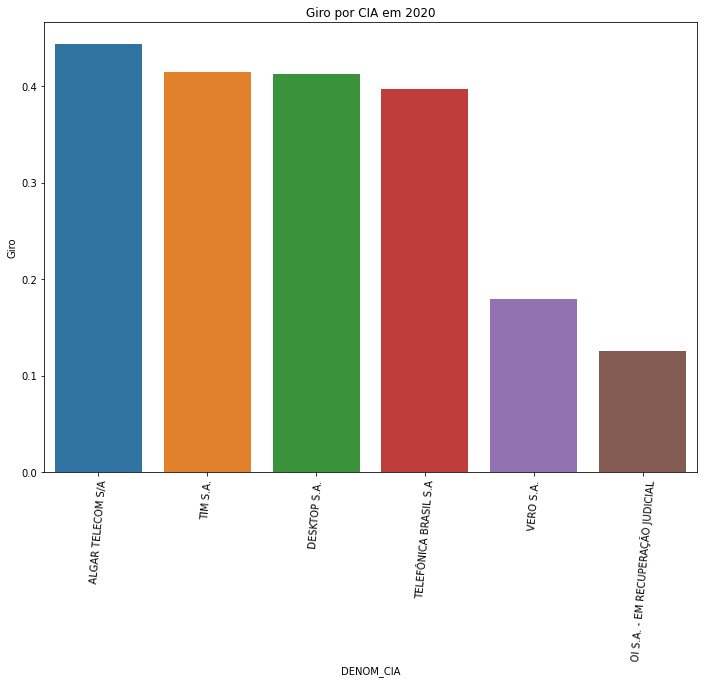

In [ ]:
fig, ax = pyplot.subplots(figsize=(11.7, 8.27))
ax.tick_params(axis='x', rotation=85)

sns.barplot(data=df_analysis_2020, 
            x="DENOM_CIA", 
            y="Giro", 
            order = df_analysis_2020.sort_values('Giro',ascending=False).DENOM_CIA).set(title='Giro por CIA em 2020')

Observamos que a empresa que possui maior giro é a Algar Telecom, ou seja, ela é a de maior capacidade em usar seu ativo total para gerar unidades monetárias de receitas líquidas de vendas.

### Indicadores de Retorno

Avaliam o retorno sobre o capital investido.

[Text(0.5, 1.0, 'Retorno por Ativo Total por CIA')]

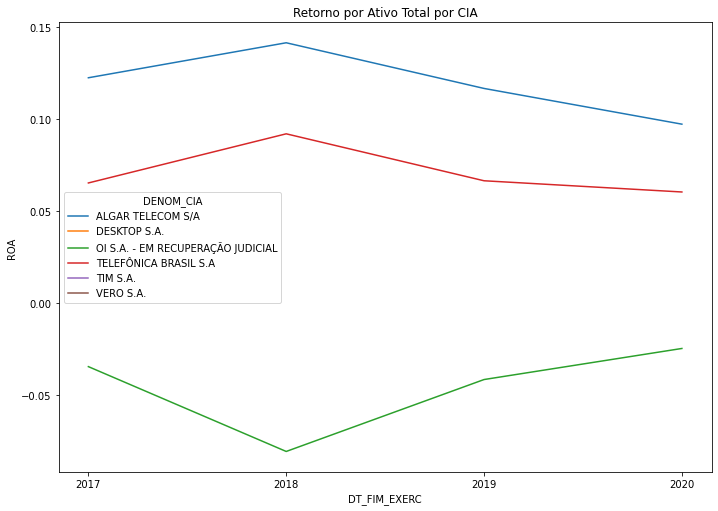

In [ ]:
fig, ax = pyplot.subplots(figsize=(11.7, 8.27))
sns.lineplot(data=df_analysis, x="DT_FIM_EXERC", y="ROA", hue="DENOM_CIA").set(title='Retorno sobre Ativo Total por CIA')

[Text(0.5, 1.0, 'Retorno por Ativo Total por CIA em 2020')]

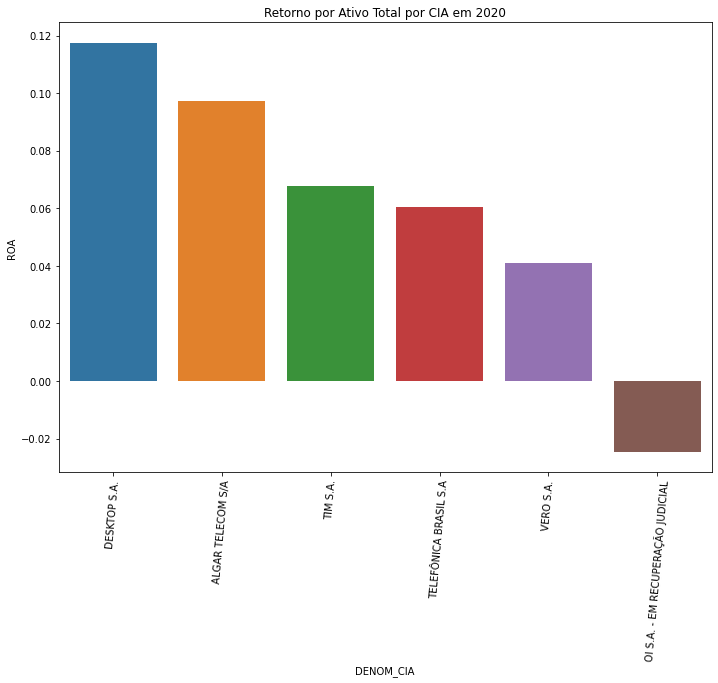

In [ ]:
fig, ax = pyplot.subplots(figsize=(11.7, 8.27))
ax.tick_params(axis='x', rotation=85)

sns.barplot(data=df_analysis_2020, 
            x="DENOM_CIA", 
            y="ROA", 
            order = df_analysis_2020.sort_values('ROA',ascending=False).DENOM_CIA).set(title='Retorno sobre Ativo Total por CIA em 2020')

[Text(0.5, 1.0, 'Retorno sobre Patrimonio Liquido por CIA')]

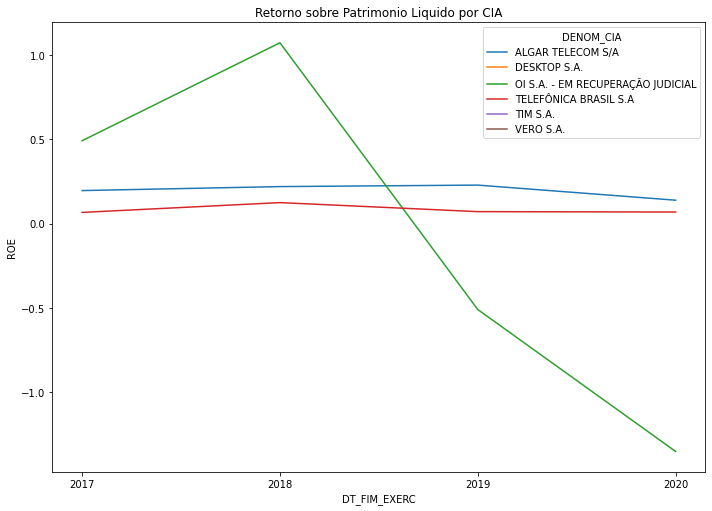

In [ ]:
fig, ax = pyplot.subplots(figsize=(11.7, 8.27))
sns.lineplot(data=df_analysis, x="DT_FIM_EXERC", y="ROE", hue="DENOM_CIA").set(title='Retorno sobre Patrimonio Liquido por CIA')

[Text(0.5, 1.0, 'Retorno sobre Patrimonio Liquido por CIA em 2020')]

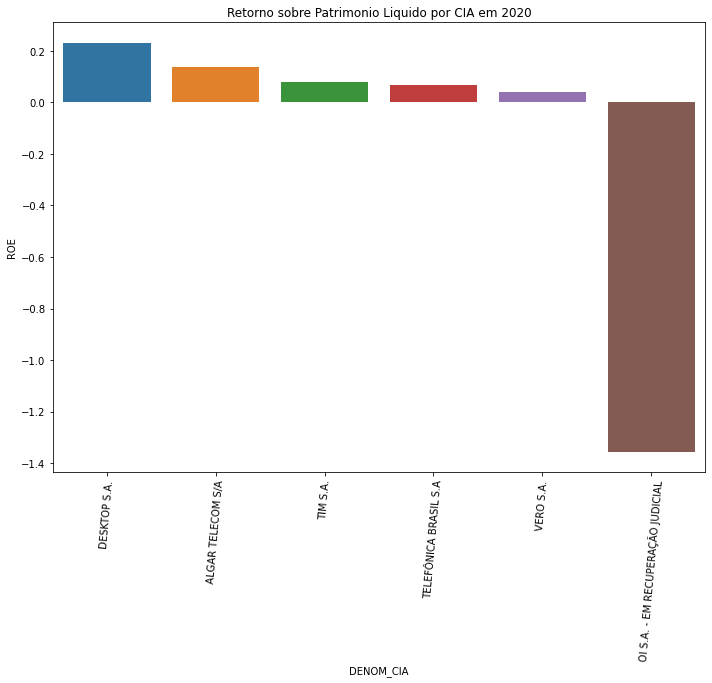

In [ ]:
fig, ax = pyplot.subplots(figsize=(11.7, 8.27))
ax.tick_params(axis='x', rotation=85)

sns.barplot(data=df_analysis_2020, 
            x="DENOM_CIA", 
            y="ROE", 
            order = df_analysis_2020.sort_values('ROE',ascending=False).DENOM_CIA).set(title='Retorno sobre Patrimonio Liquido por CIA em 2020')

###Indicadores de Lucratividade

[Text(0.5, 1.0, 'Margem Liquida por CIA')]

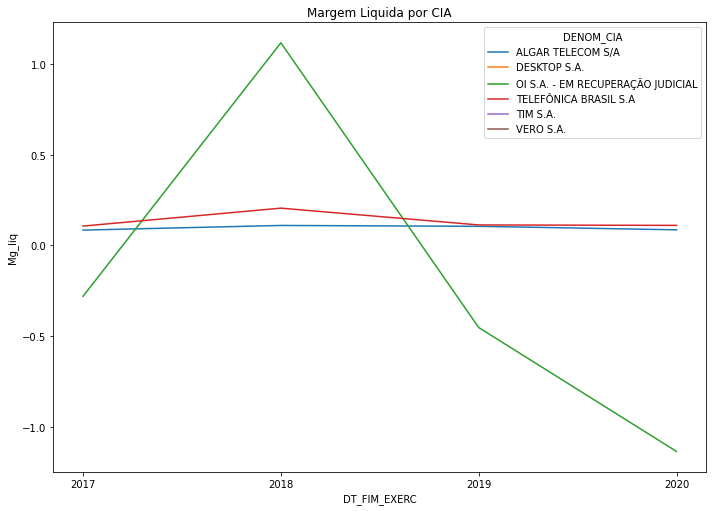

In [ ]:
fig, ax = pyplot.subplots(figsize=(11.7, 8.27))
sns.lineplot(data=df_analysis, x="DT_FIM_EXERC", y="Mg_liq", hue="DENOM_CIA").set(title='Margem Liquida por CIA')

[Text(0.5, 1.0, 'Margem Liquida por CIA em 2020')]

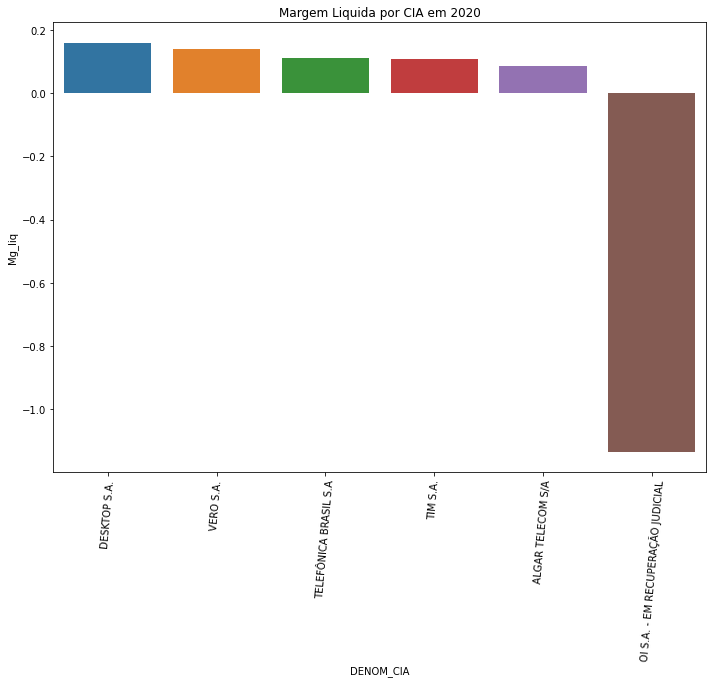

In [ ]:
fig, ax = pyplot.subplots(figsize=(11.7, 8.27))
ax.tick_params(axis='x', rotation=85)

sns.barplot(data=df_analysis_2020, 
            x="DENOM_CIA", 
            y="Mg_liq", 
            order = df_analysis_2020.sort_values('Mg_liq',ascending=False).DENOM_CIA).set(title='Margem Liquida por CIA em 2020')

[Text(0.5, 1.0, 'Margem Operacional por CIA')]

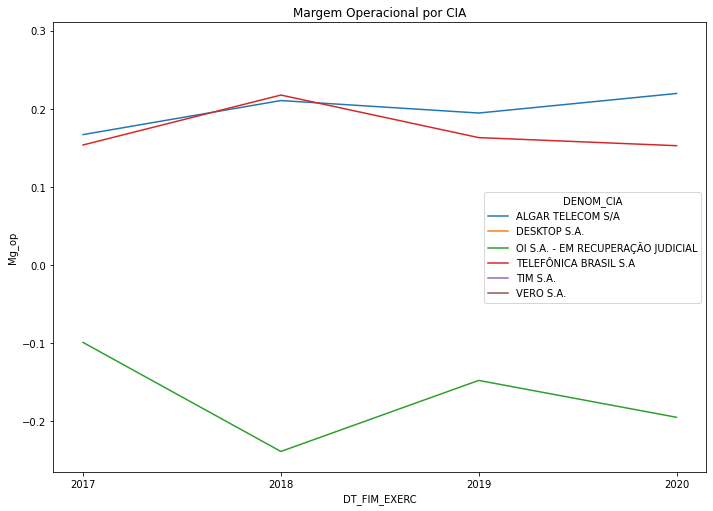

In [ ]:
fig, ax = pyplot.subplots(figsize=(11.7, 8.27))
sns.lineplot(data=df_analysis, x="DT_FIM_EXERC", y="Mg_op", hue="DENOM_CIA").set(title='Margem Operacional por CIA')

[Text(0.5, 1.0, 'Margem Operacional por CIA em 2020')]

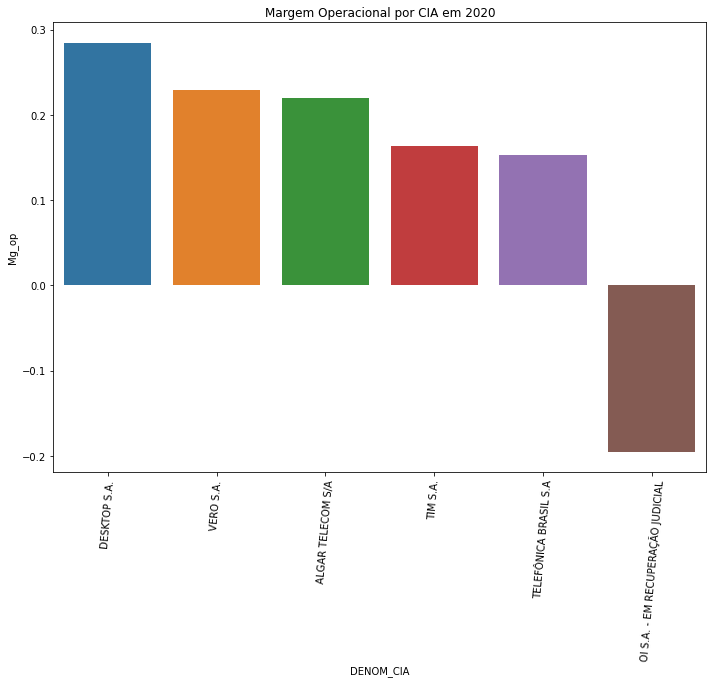

In [ ]:
fig, ax = pyplot.subplots(figsize=(11.7, 8.27))
ax.tick_params(axis='x', rotation=85)

sns.barplot(data=df_analysis_2020, 
            x="DENOM_CIA", 
            y="Mg_op", 
            order = df_analysis_2020.sort_values('Mg_op',ascending=False).DENOM_CIA).set(title='Margem Operacional por CIA em 2020')